<a href="https://colab.research.google.com/github/amfakh/Dicoding-Submission/blob/master/Machine%20Learning%20Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kriteria

1. Dataset harus dibagi menjadi train set dan validation set.
2. Harus mengimplementasikan augmentasi gambar.
3. Menggunakan image data generator.
4. Model harus menggunakan model sequential.
5. Pelatihan model tidak melebihi waktu 30 menit.
6. Program dikerjakan pada Google Colaboratory.
7. Akurasi dari model minimal 70%.
8. Dapat memprediksi gambar yang diunggah ke Colab



# Load Dataset

Proses pengunduhan dan pengekstrakan dataset hanya dilakukan sekali dan disimpan di Google Drive. <br> Oleh karena itu, sintaks terkait dinonaktifkan

In [ ]:
# !wget --no-check-certificate \
#   https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
#   -O /tmp/rps.zip

In [ ]:
# import zipfile

# tmp_zip = "/tmp/rps.zip"

# rps_zip = zipfile.ZipFile(tmp_zip, 'r')
# rps_zip.extractall('/content/drive/My Drive/rps')
# rps_zip.close()

Menentukan direktori penyimpanan seluruh dataset 

In [ ]:
base_dir = '/content/drive/My Drive/rps/rockpaperscissors/rps-cv-images'

In [ ]:
import os
os.listdir(base_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

Menentukan direktori penyimpanan masing-masing label

In [ ]:
roc_dir = os.path.join(base_dir, 'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [ ]:
roc_dir

'/content/drive/My Drive/rps/rockpaperscissors/rps-cv-images/rock'

Pengecekan file untuk memastikan file sudah terunduh dengan baik

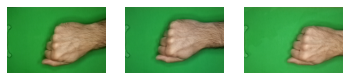

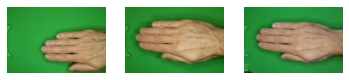

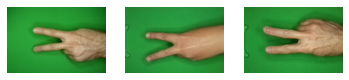

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for f in [roc_dir, pap_dir, sci_dir]:
    for i in range(3):
        sp = plt.subplot(1, 3, i + 1)
        sp.axis('Off')
        img = mpimg.imread(f + "/" + os.listdir(f)[i])
        plt.imshow(img)
    plt.show()

# Preprocess

Augmentasi gambar dengan mengubah skala menjadi 1/255 dan menerapkan horizontal serta vertical flip. 
<br> Pada tahap ini, Dataset juga dibagi menjadi 80% Data Train dan 20% Data Validation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_datagen = ImageDataGenerator(
                    rescale=1/255
                    ,horizontal_flip=True
                    ,vertical_flip = True
                    ,validation_split=0.2)

Mempersiapkan data train dan data validation yang akan dipelajari oleh model

In [ ]:
train_generator = img_datagen.flow_from_directory(
        base_dir
        ,target_size=(200, 300)
        ,batch_size=128
        ,class_mode='categorical'
        ,subset='training')

val_generator = img_datagen.flow_from_directory(
        base_dir
        ,target_size=(200, 300)
        ,batch_size=32
        ,class_mode='categorical'
        ,subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


Pengecekan untuk mengetahui nilai variabel y untuk setiap label rock, paper, dan scissors

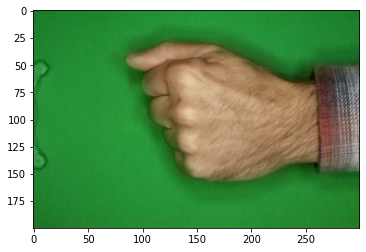

[0. 1. 0.]


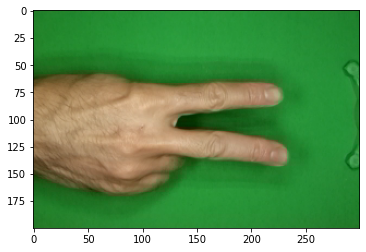

[0. 0. 1.]


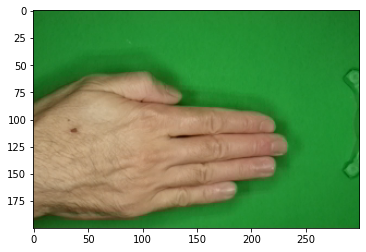

[1. 0. 0.]


In [ ]:
x, y = train_generator.next()
plt.imshow(x[0])
plt.show()
print(y[0])

plt.imshow(x[1])
plt.show()
print(y[1])

plt.imshow(x[2])
plt.show()
print(y[2])

# Modelling

Pembuatan dan pelatihan model neural network

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3))
    ,tf.keras.layers.MaxPooling2D(2, 2)
    ,tf.keras.layers.Conv2D(32, (3,3), activation='relu')
    ,tf.keras.layers.MaxPooling2D(2,2)
    ,tf.keras.layers.Flatten()
    ,tf.keras.layers.Dense(128, activation='relu')
    ,tf.keras.layers.Dense(3, activation='softmax')                            
])

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0015)
model.compile(loss='categorical_crossentropy'
              ,optimizer=adam
              ,metrics=['accuracy'])

In [ ]:
import time
time_array = []

start_time = time.time()
history = model.fit(
      train_generator
      ,steps_per_epoch=train_generator.samples // train_generator.batch_size
      ,epochs=10
      ,validation_data=val_generator
      ,validation_steps=val_generator.samples // val_generator.batch_size
      ,verbose=1)

print("--- %.2f menit ---" % ((time.time() - start_time)/60))
time_array.append(time.time() - start_time)

Epoch 1/10
13/13 [==============================] - 1172s 90s/step - loss: 1.7003 - accuracy: 0.4436 - val_loss: 0.9242 - val_accuracy: 0.6418
Epoch 2/10
13/13 [==============================] - 8s 588ms/step - loss: 0.7714 - accuracy: 0.6875 - val_loss: 0.6858 - val_accuracy: 0.7692
Epoch 3/10
13/13 [==============================] - 8s 619ms/step - loss: 0.5427 - accuracy: 0.8096 - val_loss: 0.4786 - val_accuracy: 0.8606
Epoch 4/10
13/13 [==============================] - 8s 587ms/step - loss: 0.3529 - accuracy: 0.8823 - val_loss: 0.3990 - val_accuracy: 0.8702
Epoch 5/10
13/13 [==============================] - 8s 581ms/step - loss: 0.3026 - accuracy: 0.8990 - val_loss: 0.3306 - val_accuracy: 0.8942
Epoch 6/10
13/13 [==============================] - 8s 592ms/step - loss: 0.1972 - accuracy: 0.9421 - val_loss: 0.2429 - val_accuracy: 0.9207
Epoch 7/10
13/13 [==============================] - 8s 614ms/step - loss: 0.1994 - accuracy: 0.9353 - val_loss: 0.2394 - val_accuracy: 0.9255
Epoch

Visualisasi accuracy dan loss pada tiap epoch

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    print("Training Accuracy: %.2f" % acc[-1])
    print("Training Loss: %.2f" % loss[-1])
    print("Validation Accuracy: %.2f" % val_acc[-1])
    print("Validation Loss: %.2f" % val_loss[-1] + '\n\n')

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc, 'b', label='Train acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Train and validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(loss, 'b', label='Train loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Train and validation loss')
    plt.legend()

Training Accuracy: 0.97
Training Loss: 0.10
Validation Accuracy: 0.94
Validation Loss: 0.16




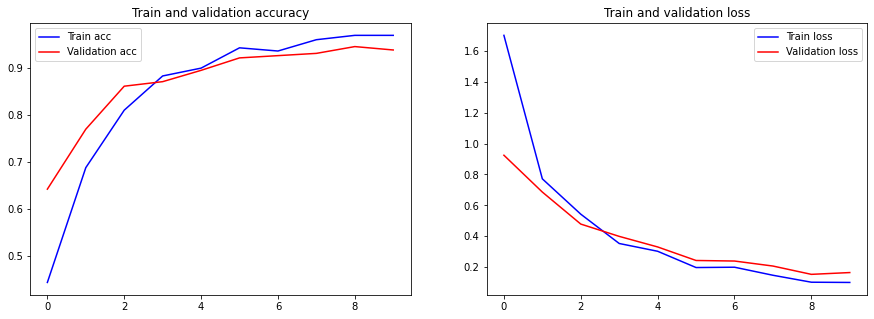

In [ ]:
plot_history(history)

# Predict

Prediksi gambar file yang diunggah dari komputer

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

Using TensorFlow backend.


Saving 5.jpg to 5.jpg


Nama file kamu adalah: 5.jpg
Kamu telah mengeluarkan gunting


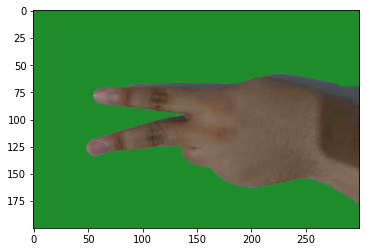

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)


  print('\n\nNama file kamu adalah: ' + fn)
  if y_classes==0:
    print('Kamu telah mengeluarkan kertas')
  elif y_classes==1:
    print('Kamu telah mengeluarkan batu')
  else:
    print('Kamu telah mengeluarkan gunting')


Saving WhatsApp Image 2020-05-08 at 22.39.01 (1).jpeg to WhatsApp Image 2020-05-08 at 22.39.01 (1) (2).jpeg


Nama file kamu adalah: WhatsApp Image 2020-05-08 at 22.39.01 (1).jpeg
Kamu telah mengeluarkan kertas


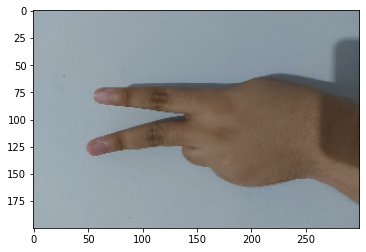

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  y_classes = classes.argmax(axis=-1)


  print('\n\nNama file kamu adalah: ' + fn)
  if y_classes==0:
    print('Kamu telah mengeluarkan kertas')
  elif y_classes==1:
    print('Kamu telah mengeluarkan batu')
  else:
    print('Kamu telah mengeluarkan gunting')


# Kesimpulan

1.   Model memiliki akurasi train accuracy sebesar ~97% dan validation accuracy sebesar ~94%
2.   Optimizer Adam tetap digunakan namun dengan pengubahan learning rate karena penggunaan RMSProp di database ini menyebabkan training tidak stabil 
3.   Karena seluruh dataset memiliki latar belakang hijau, dataset kurang cakap dalam memprediksi gambar yang memiliki latar belakang warna lain
